In [1]:
from random import randint

import numpy as np
import scipy.stats as stats
#import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Bandit class

In [42]:
class Bandit():
    '''
    Class for simulating multi-armed bandit
    '''
    def __init__(self, k=10, 
                 num_steps=1000, 
                 Q_init=0, 
                 eps=0.1, 
                 reward_mean=0, 
                 reward_var=1, 
                 stationary=True, 
                 learning_rate=1, 
                 const_step=False):
        
        # Parameters
        self.k = k
        self.eps = eps
        self.num_steps = num_steps
        self.learning_rate = learning_rate
        self.const_step = const_step
        
        # Set rewards
        self.true_rewards = self.set_true_rewards(reward_mean, reward_var)
        self.reward = np.zeros(num_steps)
        self.stationary = stationary
        
        # Track optimal action
        self.A_star = np.argmax(self.true_rewards)
        self.optimal_action = np.zeros(num_steps)
        
        # Initialize action-value estimates
        self.Q = Q_init * np.ones(k) 
        self.N = np.zeros(k)
        
    def set_true_rewards(self, mean, var):
        return np.random.normal(mean, var, self.k)
        
    def choose_action(self):
        # Greedy
        if self.eps == 0:
            indices = np.argwhere(self.Q == np.amax(self.Q)).flatten()
            return indices[randint(0, len(indices) - 1)]
        # Epsilon-greedy
        else:
            sample = np.random.uniform(0, 1, 1)
            if sample <= self.eps:
                return randint(0, self.k - 1)
            else:
                return np.argmax(self.Q)
    
    def get_reward(self, A):
        return np.random.normal(self.true_rewards[A], 1, 1)
    
    def update(self, A, R):
        # Update number of times that action has been selected
        self.N[A] += 1
        # update learning rate
        if not self.const_step:
            self.learning_rate = 1 / self.N[A]
        # Update Q
        self.Q[A] += self.learning_rate * (R - self.Q[A])
        return
    
    def run(self):
        for i in range(self.num_steps):
            if not self.stationary:
                self.true_rewards += self.set_true_rewards(mean=0, var=0.01)
            a = self.choose_action()
            if a == self.A_star:
                self.optimal_action[i] += 1
            self.reward[i] = self.get_reward(a)
            self.update(a, self.reward[i])
        return

# Utils

In [45]:
def plot_fig1(k, num_samples):
    # Generate rewards
    true_rewards = np.random.normal(0, 1, k)
    d = np.random.normal(0, 1, (num_samples, k))
    d += true_rewards
    # Generate plot
    fig, ax = plt.subplots()
    ax.violinplot(dataset=d)
    # Label
    ax.set_xlabel('Action')
    ax.set_ylabel('Reward \n distribution')
    # Frame
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Dashed line
    plt.axhline(0, color='k', linestyle='dashed', linewidth=0.5)
    # Ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks(np.arange(1, 10, 1))
    return

def plot_fig2(reward, optimal_action):
    f, axes = plt.subplots(nrows=2)
    T = range(reward.shape[1])
    # Average reward
    for i in range(reward.shape[0]):
        axes[0].plot(T, reward[i, :])
        
    # Optimal action
    for i in range(optimal_action.shape[0]):
        axes[1].plot(T, optimal_action[i, :])
    return

def run_experiment(params):
    # Params
    k = params['k']
    epsilons = params['epsilons']
    num_steps = params['num_steps']
    num_trials = params['num_trials']
    reward_mean = params['reward_mean']
    reward_var = params['reward_var']
    stationary = params['stationary']
    Q_init = params['Q_init']
    
    # Create arrays to store reward and optimal action selection
    reward = np.zeros((len(epsilons), num_steps))
    optimal_action = np.zeros((len(epsilons), num_steps))
    # Run experiment
    for i, eps in enumerate(epsilons):
        for j in range(num_trials):
            bandit = Bandit(k=k, num_steps=num_steps, eps=eps, Q_init=Q_init, 
                            reward_mean=reward_mean, reward_var=reward_var, stationary=stationary)
            bandit.run()
            reward[i, :] += bandit.reward
            optimal_action[i, :] += bandit.optimal_action
    # Normalize reward and optimal_action selection
    reward /= num_trials
    optimal_action /= num_trials
    return reward, optimal_action

# Figure 2.1

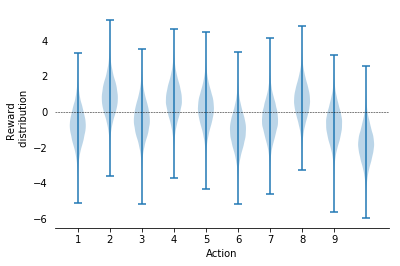

In [4]:
plot_fig1(10, 50000)

# Figure 2.2

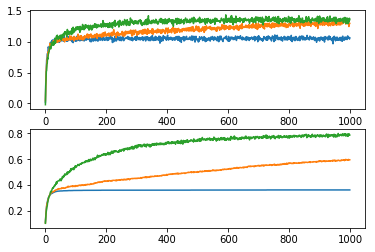

In [5]:
'''10-armed bandit with stationary reward distribution'''

params = {
    'epsilons': [0, 0.01, 0.1],
    'k': 10, 
    'num_steps': 1000, 
    'num_trials': 2000,
    'Q_init': 0,
    'reward_mean': 0,
    'reward_var': 1,
    'stationary': True}
    

reward, optimal_action = run_experiment(params)
plot_fig2(reward, optimal_action)

# Figure 2.3

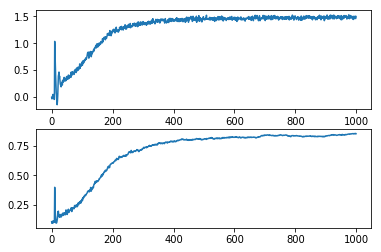

In [41]:
'''10-armed bandit with optimistic intial action-value estimates for stationary reward distribution'''

params = {
    'epsilons': [0],
    'k': 10, 
    'num_steps': 1000, 
    'num_trials': 2000,
    'Q_init': 5,
    'reward_mean': 0,
    'reward_var': 1,
    'stationary': True}
    

reward, optimal_action = run_experiment(params)
plot_fig2(reward, optimal_action)

# Figure 2.4

In [ ]:
'''UCB vs eps-greed on the 10-armed bandit for stationary distribution reward distribution'''

# Figure 2.5

In [ ]:
'''UCB vs eps-greed on the 10-armed bandit for stationary distribution reward distribution'''

# Figure 2.6

# Exercise 2.5

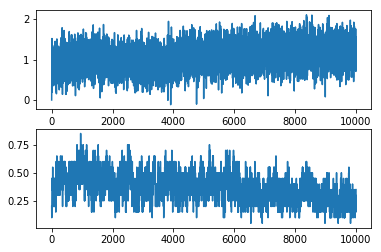

In [46]:
'''10-armed bandit, sample averages incrementally, non-stationary reward distribution'''
params = {
    'epsilons': [0.1],
    'k': 10, 
    'num_steps': 10000, 
    'num_trials': 20,
    'Q_init': 0,
    'reward_mean': 0,
    'reward_var': 1,
    'stationary': False}
    

reward, optimal_action = run_experiment(params)
plot_fig2(reward, optimal_action)

In [ ]:
'''10-armed bandit, constant step size, non-stationary reward distribution'''
params = {
    'epsilons': [0.1],
    'k': 10, 
    'num_steps': 10000, 
    'num_trials': 2000,
    'Q_init': 0,
    'reward_mean': 0,
    'reward_var': 1,
    'stationary': False,
    'learning_rate': 0.1,
    'const_step': True}
    

reward, optimal_action = run_experiment(params)
plot_fig2(reward, optimal_action)

# Other Experiments

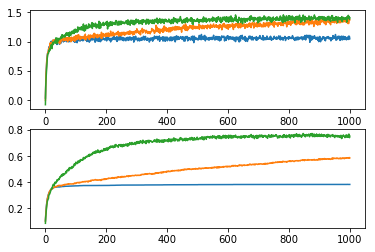

In [18]:
'''10-armed bandit for stationary distribution'''
params = {
    'epsilons': [0, 0.01, 0.1],
    'k': 10, 
    'num_steps': 1000, 
    'num_trials': 2000,
    'Q_init': 0,
    'reward_mean': 0,
    'reward_var': 1,
    'stationary': False}
    

reward, optimal_action = run_experiment(params)
plot_fig2(reward, optimal_action)

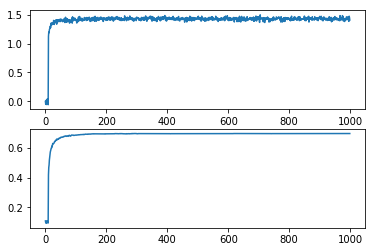

In [39]:
'''10-armed bandit with optimistic intial action-value estimates for stationary distribution'''

params = {
    'epsilons': [0],
    'k': 10, 
    'num_steps': 1000, 
    'num_trials': 2000,
    'Q_init': 5,
    'reward_mean': 0,
    'reward_var': 1,
    'stationary': True}
    

reward, optimal_action = run_experiment(params)
plot_fig2(reward, optimal_action)

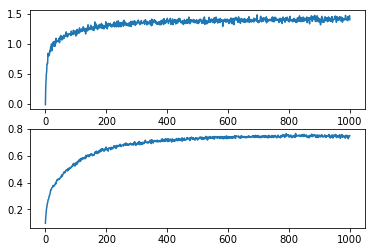

In [4]:
'''
10-armed bandit 
Nonstationary reward
Sample averaging
Changing step size
'''
params = {
    'epsilons': [0.1],
    'k': 10, 
    'num_steps': 1000, 
    'num_trials': 2000,
    'Q_init': 0,
    'reward_mean': 0,
    'reward_var': 1,
    'stationary': False,
    'learning_rate': 0.1,
    'const_step': False}
    

reward, optimal_action = run_experiment(params)
plot_fig2(reward, optimal_action)